In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import analysis_util
import plotly.express as px
import networkx as nx
import pickle
import os
from tqdm import tqdm
sns.set_theme()
from scipy.stats import pearsonr
import datetime

In [3]:
# df_10 = pd.read_csv('/home/pelle/Master_Thesis/data/processed/wallstreetbets_temporal_graphs/graphs_10/df_final.csv')
# df_10['date'] = pd.to_datetime(df_10['Unnamed: 0'])
# df_10 = df_10.set_index('date')
# df_10.sort_index(inplace=True)
# df_10 = df_10.drop(columns=['Unnamed: 0'])

df_10_windowed = pd.read_csv('/home/pelle/Master_Thesis/data/processed/wallstreetbets_temporal_graphs/graphs_windowed_10/df_final.csv')
df_10_windowed['date'] = pd.to_datetime(df_10_windowed['Unnamed: 0'])
df_10_windowed = df_10_windowed.set_index('date')
df_10_windowed.sort_index(inplace=True)
df_10_windowed = df_10_windowed.drop(columns=['Unnamed: 0'])


df_26_windowed = pd.read_csv('/home/pelle/Master_Thesis/data/processed/wallstreetbets_temporal_graphs/graphs_windowed_26/df_final.csv')
df_26_windowed['date'] = pd.to_datetime(df_26_windowed['Unnamed: 0'])
df_26_windowed = df_26_windowed.set_index('date')
df_26_windowed.sort_index(inplace=True)
df_26_windowed = df_26_windowed.drop(columns=['Unnamed: 0'])

In [133]:
def make_plots(df,title):
    fig, ax = plt.subplots(1, 3, figsize=(30, 10))
    fig.suptitle(title, fontsize=20)

    sns.lineplot(data=df['N_nodes'], label='N Nodes',drawstyle='steps-post',ax=ax[0])
    sns.scatterplot(data=df['N_nodes'],ax=ax[0])
    sns.lineplot(data=df['N_edges'], label='N Edges',drawstyle='steps-post',ax=ax[0])
    sns.scatterplot(data=df['N_edges'],ax=ax[0])
    ax[0].set_title('N Nodes/Edges', fontsize=17)
    # ax[0].set_xticklabels(df.index.year, rotation=45, ha='right', fontsize=12)
    ax[0].set_xlabel('Date', fontsize=14)
    ax[0].set_ylabel('Number', fontsize=14)
    ax[0].set_yscale('log')
    ax[0].legend(fontsize=14)

    sns.lineplot(data=df['clustering_coefficient'] ,drawstyle='steps-post',ax=ax[1])
    sns.scatterplot(data=df['clustering_coefficient'],ax=ax[1])
    ax[1].set_title('Clustering Coefficient', fontsize=15)
    # ax[1].set_xticks(df.index.year, rotation=45, ha='right', fontsize=12)
    ax[1].set_xlabel('Date', fontsize=14)
    ax[1].set_ylabel('Clustering Coefficient', fontsize=14)

    sns.scatterplot(x='N_nodes',y='clustering_coefficient',data=df,ax=ax[2])
    sns.regplot(x='N_nodes',y='clustering_coefficient',data=df,ax=ax[2],scatter=False, color='red',line_kws={'linewidth':1})
    ax[2].set_title('Clustering Coefficient', fontsize=15)
    ax[2].set_xscale('log')
    ax[2].set_xlabel('Clustering Coefficient', fontsize=14)
    ax[2].set_ylabel('N Nodes', fontsize=14)
    plt.tight_layout()
    plt.show()

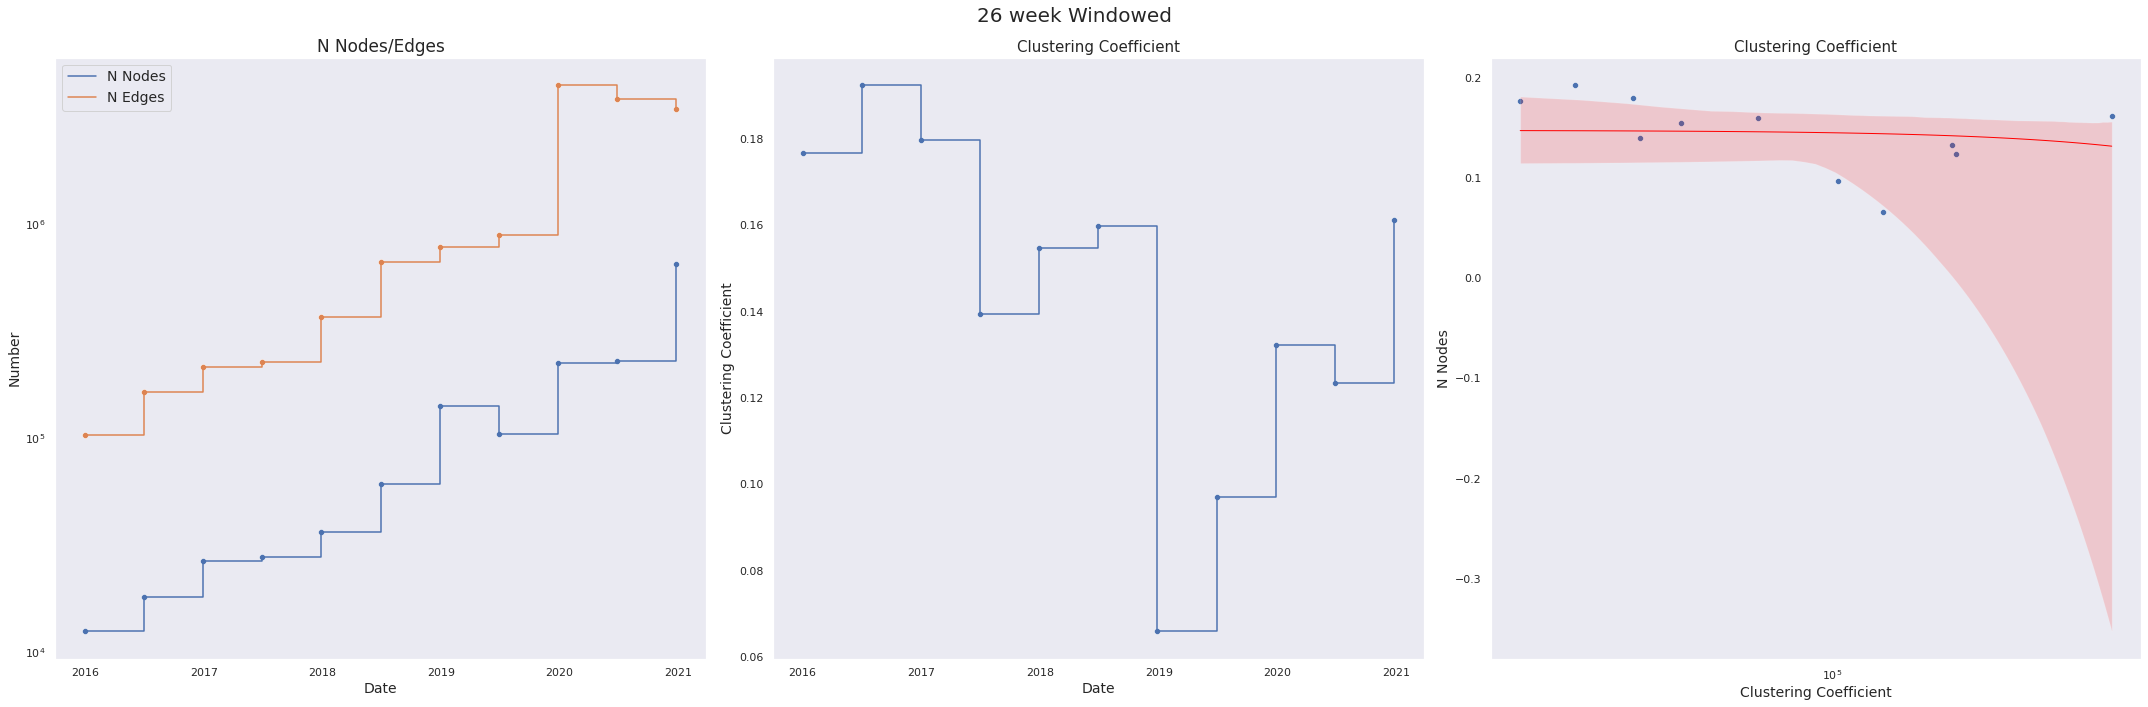

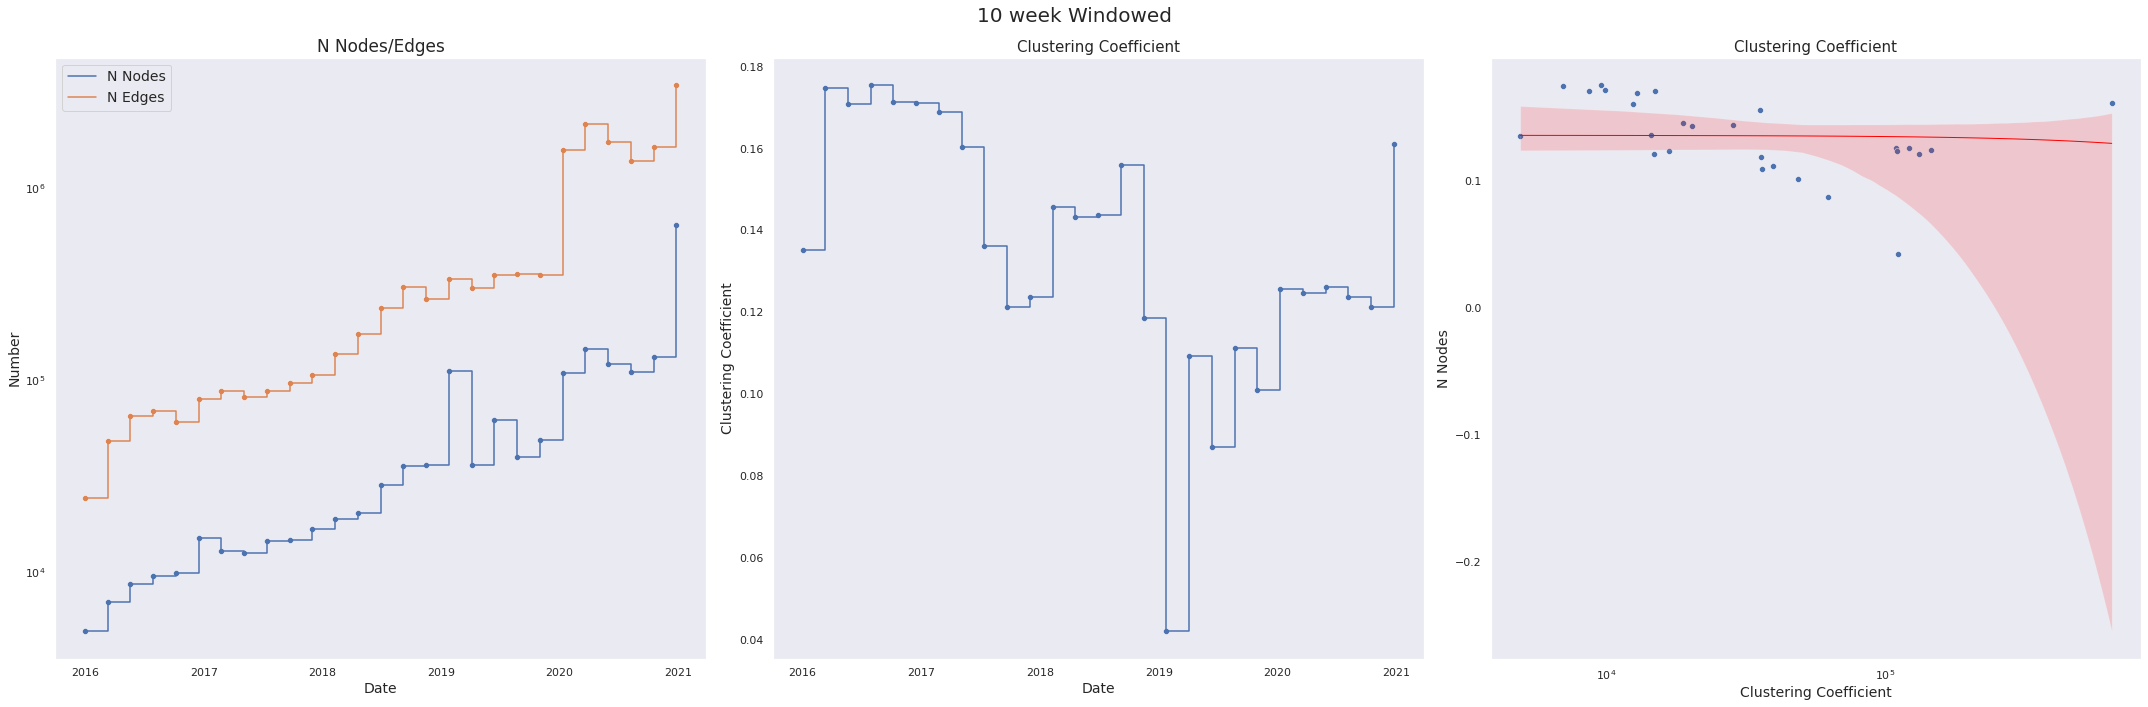

In [134]:
make_plots(df_26_windowed,'26 week Windowed')
make_plots(df_10_windowed,'10 week Windowed')

In [135]:
# plt.figure(figsize=(13,8))

# sns.lineplot(data=df_26_windowed['clustering_coefficient'], label='26 weeks windowed')
# sns.scatterplot(data=df_26_windowed['clustering_coefficient'])

# sns.lineplot(data=df_10_windowed['clustering_coefficient'],label='10 weeks windowed')
# sns.scatterplot(data=df_10_windowed['clustering_coefficient'])

# # sns.lineplot(data=df_10['clustering_coefficient'],label='10 weeks')
# # sns.scatterplot(data=df_10['clustering_coefficient'])

# plt.show()

In [136]:
# plt.figure(figsize=(13,8))

# sns.lineplot(data=df_26_windowed['N_nodes'], label='26 weeks windowed')
# sns.scatterplot(data=df_26_windowed['N_nodes'])

# sns.lineplot(data=df_10_windowed['N_nodes'],label='10 weeks windowed')
# sns.scatterplot(data=df_10_windowed['N_nodes'])

# # sns.lineplot(data=df_10['N_nodes'],label='10 weeks')
# # sns.scatterplot(data=df_10['N_nodes'])

# # log scale
# plt.yscale('log')


# plt.show()

In [111]:
p='/home/pelle/Master_Thesis/data/processed/wallstreetbets_scores/graphs_10_v2'

files = os.listdir(p)

def get_before_date(file_name):
    return datetime.datetime.strptime(file_name[16:-4], '%Y-%m-%d')

files_date_dict = {}

for file in files:
    date = get_before_date(file)
    if date in files_date_dict:
        "Error: date already in dict"
    else:
        files_date_dict[date] = [file]

files_date_dict = {k: v for k, v in sorted(files_date_dict.items(), key=lambda item: item[0])}

mc = []
md = []
ms = []
mean_mean_score = []
mean_clustering_coefficient = []

for file in tqdm(files_date_dict.values()):
    df_scores=pd.read_csv(p+'/'+file[0])
    df_scores.degree = df_scores.degree.apply(lambda x: int(x) if x.isdigit() else 0)
    rho = df_scores.corr()
    mc.append(rho['mean_score']['clustering_coefficient'])
    md.append(rho['mean_score']['degree'])
    ms.append(rho['mean_score']['sum_score'])

    mean_mean_score.append(df_scores.mean_score.mean())
    mean_clustering_coefficient.append(df_scores.clustering_coefficient.mean())
    # deviation_scores.append(df_scores.sum_score.std())
    # max_scores.append(df_scores.sum_score.max())

100%|██████████| 23/23 [00:06<00:00,  3.65it/s]


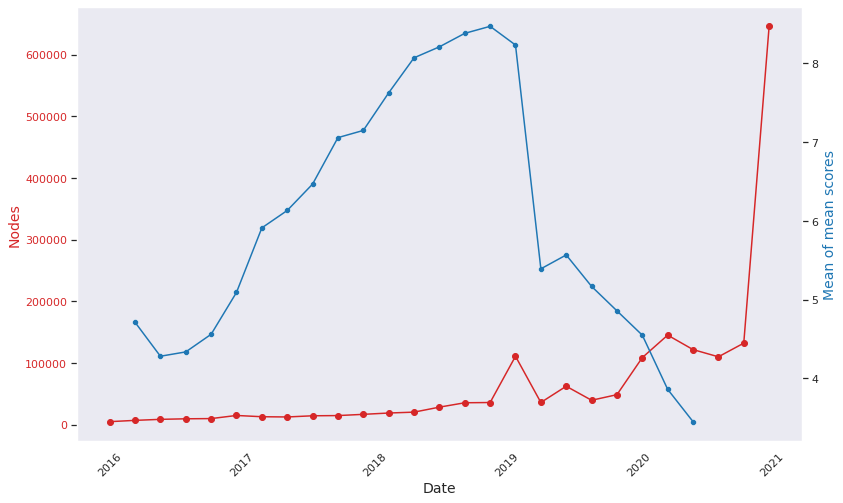

In [112]:
## seaborn theme no grid
sns.set_style("darkgrid", {'axes.grid' : False})

fig, ax1 = plt.subplots(figsize=(13,8))

color = 'tab:red'
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Nodes', color=color, fontsize=14)

ax1.plot(df_10_windowed.index, df_10_windowed['N_nodes'], color=color)
ax1.scatter(df_10_windowed.index, df_10_windowed['N_nodes'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', labelrotation=45)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Mean of mean scores', color=color, fontsize=14)  # we already handled the x-label with ax1
sns.scatterplot(x=list(files_date_dict.keys()),y=mean_mean_score, color=color, ax=ax2)
sns.lineplot(x=list(files_date_dict.keys()),y=mean_mean_score, color=color, ax=ax2)

plt.show()

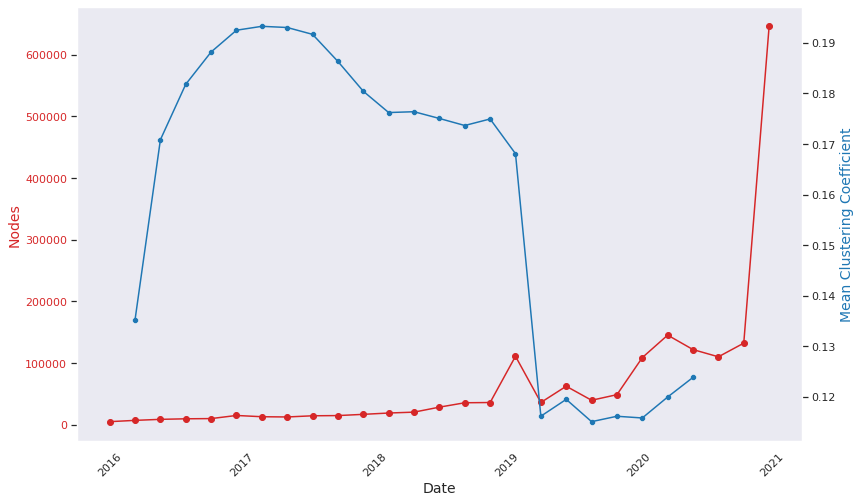

In [113]:
## seaborn theme no grid
sns.set_style("darkgrid", {'axes.grid' : False})

fig, ax1 = plt.subplots(figsize=(13,8))

color = 'tab:red'
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Nodes', color=color, fontsize=14)

ax1.plot(df_10_windowed.index, df_10_windowed['N_nodes'], color=color)
ax1.scatter(df_10_windowed.index, df_10_windowed['N_nodes'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', labelrotation=45)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Mean Clustering Coefficient', color=color, fontsize=14)  # we already handled the x-label with ax1
sns.scatterplot(x=list(files_date_dict.keys()),y=mean_clustering_coefficient, color=color, ax=ax2)
sns.lineplot(x=list(files_date_dict.keys()),y=mean_clustering_coefficient, color=color, ax=ax2)

plt.show()

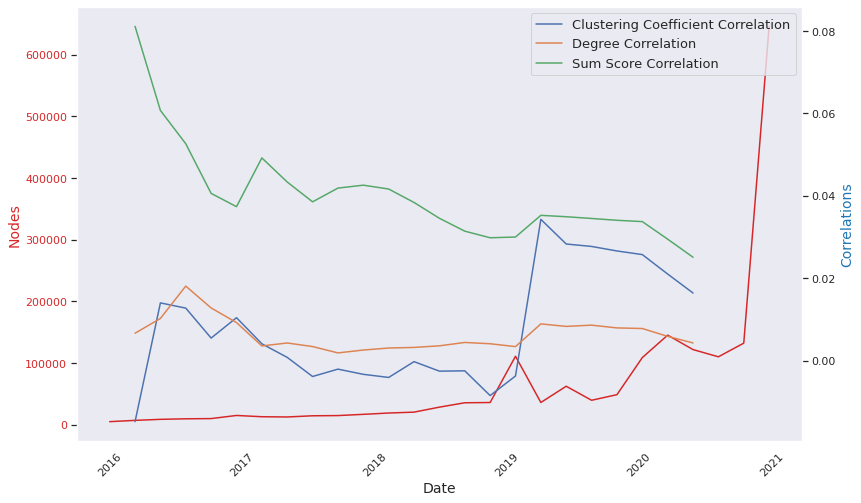

In [114]:
sns.set_style("darkgrid", {'axes.grid' : False})

fig, ax1 = plt.subplots(figsize=(13,8))

color = 'tab:red'
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Nodes', color=color, fontsize=14)

ax1.plot(df_10_windowed.index, df_10_windowed['N_nodes'], color=color, label='Nodes')


ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', labelrotation=45)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Correlations', color=color, fontsize=14)  # we already handled the x-label with ax1

sns.lineplot(x=list(files_date_dict.keys()),y=mc,label='Clustering Coefficient Correlation',ax=ax2)
sns.lineplot(x=list(files_date_dict.keys()),y=md,label='Degree Correlation',ax=ax2)
sns.lineplot(x=list(files_date_dict.keys()),y=ms,label='Sum Score Correlation',ax=ax2)
plt.legend(fontsize=13, loc='upper right')

plt.show()

In [ ]:
# 